# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the variables needed for multiple openweathermap api calls
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
count = 1
# Initialize lists for the columns of the dataframe
citiesWithData = []
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

for city in cities:
    city = city.replace(" ", "+")  #replace space with + for url
    # Request and get json from api
    query_url = f"{base_url}&appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    print(f"Processing city {count} of {len(cities)} | {city} cod:{response['cod']}")
    
    # Verify the response has all needed data
    if response['cod'] == 200:
        citiesWithData.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    count += 1

Processing city 1 of 614 | busselton cod:200
Processing city 2 of 614 | dabakala cod:200
Processing city 3 of 614 | santa+maria cod:200
Processing city 4 of 614 | kapaa cod:200
Processing city 5 of 614 | souillac cod:200
Processing city 6 of 614 | bengkulu cod:200
Processing city 7 of 614 | college cod:200
Processing city 8 of 614 | provideniya cod:200
Processing city 9 of 614 | kodiak cod:200
Processing city 10 of 614 | araouane cod:200
Processing city 11 of 614 | rikitea cod:200
Processing city 12 of 614 | clyde+river cod:200
Processing city 13 of 614 | viligili cod:404
Processing city 14 of 614 | zaraza cod:200
Processing city 15 of 614 | myanaung cod:200
Processing city 16 of 614 | antofagasta cod:200
Processing city 17 of 614 | nizhneyansk cod:404
Processing city 18 of 614 | airai cod:200
Processing city 19 of 614 | saint-philippe cod:200
Processing city 20 of 614 | belushya+guba cod:404
Processing city 21 of 614 | atasu cod:200
Processing city 22 of 614 | avarua cod:200
Processin

Processing city 179 of 614 | san+vicente+de+canete cod:200
Processing city 180 of 614 | fukue cod:200
Processing city 181 of 614 | hithadhoo cod:200
Processing city 182 of 614 | bambous+virieux cod:200
Processing city 183 of 614 | livingston cod:200
Processing city 184 of 614 | shingu cod:200
Processing city 185 of 614 | iwanai cod:200
Processing city 186 of 614 | saleaula cod:404
Processing city 187 of 614 | cap+malheureux cod:200
Processing city 188 of 614 | chuy cod:200
Processing city 189 of 614 | surt cod:200
Processing city 190 of 614 | sitka cod:200
Processing city 191 of 614 | miyako cod:200
Processing city 192 of 614 | dalhousie cod:200
Processing city 193 of 614 | castro cod:200
Processing city 194 of 614 | vanimo cod:200
Processing city 195 of 614 | sahrak cod:404
Processing city 196 of 614 | phayao cod:200
Processing city 197 of 614 | mahebourg cod:200
Processing city 198 of 614 | changji cod:200
Processing city 199 of 614 | letpadan cod:200
Processing city 200 of 614 | mar

Processing city 358 of 614 | mbeya cod:200
Processing city 359 of 614 | maceio cod:200
Processing city 360 of 614 | suzhou cod:200
Processing city 361 of 614 | gebre+guracha cod:200
Processing city 362 of 614 | anadyr cod:200
Processing city 363 of 614 | luorong cod:200
Processing city 364 of 614 | kropotkin cod:200
Processing city 365 of 614 | peace+river cod:200
Processing city 366 of 614 | ostrovnoy cod:200
Processing city 367 of 614 | tambun cod:200
Processing city 368 of 614 | lagoa cod:200
Processing city 369 of 614 | jardim cod:200
Processing city 370 of 614 | tuatapere cod:200
Processing city 371 of 614 | montes+claros cod:200
Processing city 372 of 614 | svobodnyy cod:200
Processing city 373 of 614 | dombarovskiy cod:200
Processing city 374 of 614 | sao+joao+evangelista cod:200
Processing city 375 of 614 | abnub cod:200
Processing city 376 of 614 | harper cod:200
Processing city 377 of 614 | tanete cod:200
Processing city 378 of 614 | udachnyy cod:200
Processing city 379 of 61

Processing city 535 of 614 | sept-iles cod:200
Processing city 536 of 614 | guarulhos cod:200
Processing city 537 of 614 | acheng cod:200
Processing city 538 of 614 | kachikau cod:404
Processing city 539 of 614 | santiago+del+estero cod:200
Processing city 540 of 614 | tanta cod:200
Processing city 541 of 614 | quballat cod:200
Processing city 542 of 614 | zhongshan cod:200
Processing city 543 of 614 | aranos cod:200
Processing city 544 of 614 | sayan cod:200
Processing city 545 of 614 | yara cod:200
Processing city 546 of 614 | inverell cod:200
Processing city 547 of 614 | eydhafushi cod:200
Processing city 548 of 614 | bowen cod:200
Processing city 549 of 614 | nizhniy+odes cod:200
Processing city 550 of 614 | bali+chak cod:200
Processing city 551 of 614 | nalgonda cod:200
Processing city 552 of 614 | meulaboh cod:200
Processing city 553 of 614 | ijaki cod:404
Processing city 554 of 614 | touros cod:200
Processing city 555 of 614 | enshi cod:200
Processing city 556 of 614 | lagoa+ver

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create and display the weather data frame
weather_df = pd.DataFrame({"City": citiesWithData,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxTemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed":windSpeed,
                          "Country": country,
                          "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,75.00,56,24,1.99,AU,1619233658
1,Dabakala,8.3667,-4.4333,77.81,75,99,5.48,CI,1619234360
2,Santa Maria,-29.6842,-53.8069,62.60,88,0,5.75,BR,1619233832
3,Kapaa,22.0752,-159.3190,77.00,69,40,18.41,US,1619233629
4,Souillac,-20.5167,57.5167,75.20,94,75,11.50,MU,1619234010
...,...,...,...,...,...,...,...,...,...
561,Santa Isabel Rio Negro,-0.4139,-65.0192,74.16,96,80,2.19,BR,1619234477
562,Çermik,38.1361,39.4493,41.00,70,0,6.91,TR,1619234477
563,Trelew,-43.2490,-65.3051,53.20,70,0,13.11,AR,1619234033
564,Taoudenni,22.6783,-3.9836,85.03,8,0,8.39,ML,1619233801


In [5]:
# Output all data to csv
weather_df.to_csv("Output/weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check for and remove any rows that have humidity over 100%
if weather_df.describe().loc['max', 'Humidity'] > 100:
    weather_df = weather_df[weather_df.Humidity <= 100]
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,75.00,56,24,1.99,AU,1619233658
1,Dabakala,8.3667,-4.4333,77.81,75,99,5.48,CI,1619234360
2,Santa Maria,-29.6842,-53.8069,62.60,88,0,5.75,BR,1619233832
3,Kapaa,22.0752,-159.3190,77.00,69,40,18.41,US,1619233629
4,Souillac,-20.5167,57.5167,75.20,94,75,11.50,MU,1619234010
...,...,...,...,...,...,...,...,...,...
561,Santa Isabel Rio Negro,-0.4139,-65.0192,74.16,96,80,2.19,BR,1619234477
562,Çermik,38.1361,39.4493,41.00,70,0,6.91,TR,1619234477
563,Trelew,-43.2490,-65.3051,53.20,70,0,13.11,AR,1619234033
564,Taoudenni,22.6783,-3.9836,85.03,8,0,8.39,ML,1619233801


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

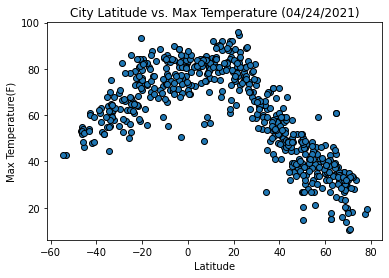

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor='black')
plt.title("City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Figures/LatVSTemp.png")
plt.show()

## Latitude vs. Humidity Plot

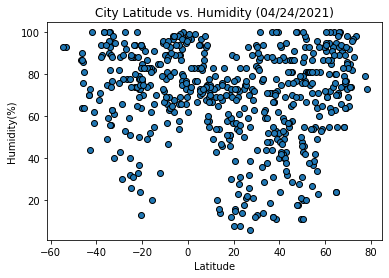

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor='black')
plt.title("City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Figures/LatVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

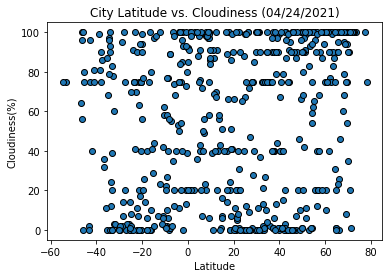

In [33]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor='black')
plt.title("City Latitude vs. Cloudiness (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Figures/LatVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

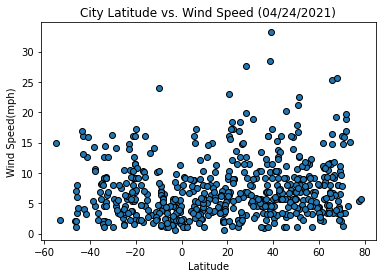

In [34]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor='black')
plt.title("City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Figures/LatVSWindSpeed.png")
plt.show()

## Linear Regression

In [58]:
# Seperate the weather data frame into nothern and southern hemispheres
northernHemisphere = weather_df[weather_df.Lat >= 0]
southernHemisphere = weather_df[weather_df.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is -0.8918470315730043


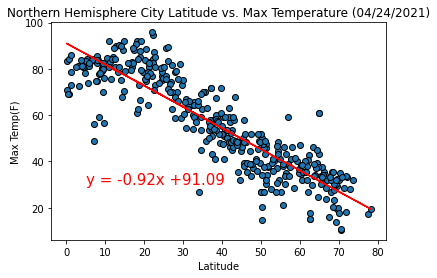

<Figure size 432x288 with 0 Axes>

In [59]:
(slp1, int1, rval1, pval1, stderr1) = linregress(northernHemisphere["Lat"], northernHemisphere["Max Temp"])
fit1 = northernHemisphere["Lat"] * slp1 + int1
line_eq1 = "y = " + str(round(slp1,2)) + "x +" + str(round(int1,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Max Temp"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit1,"r-")
plt.annotate(line_eq1,(5,30),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")

print(f"The r-squared value is {rval1}")
plt.savefig("Figures/NorthernHemisphereVSTemp.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7249910780228849


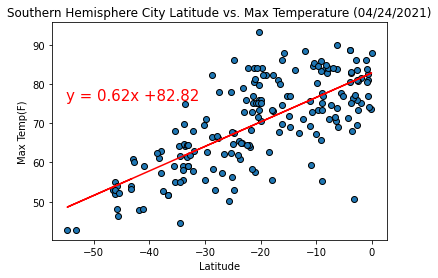

<Figure size 432x288 with 0 Axes>

In [60]:
(slp2, int2, rval2, pval2, stderr2) = linregress(southernHemisphere["Lat"], southernHemisphere["Max Temp"])
fit2 = southernHemisphere["Lat"] * slp2 + int2
line_eq2 = "y = " + str(round(slp2,2)) + "x +" + str(round(int2,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Max Temp"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit2,"r-")
plt.annotate(line_eq2,(-55, 76),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Max Temperature (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")

print(f"The r-squared value is {rval2}")
plt.savefig("Figures/SouthernHemisphereVSTemp.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.1188663630267419


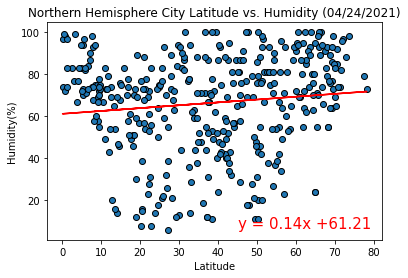

<Figure size 432x288 with 0 Axes>

In [61]:
(slp3, int3, rval3, pval3, stderr3) = linregress(northernHemisphere["Lat"], northernHemisphere["Humidity"])
fit3 = northernHemisphere["Lat"] * slp3 + int3
line_eq3 = "y = " + str(round(slp3,2)) + "x +" + str(round(int3,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Humidity"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit3,"r-")
plt.annotate(line_eq3,(45,7),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

print(f"The r-squared value is {rval3}")
plt.show()
plt.savefig("Figures/NorthernHemisphereVSHumidity.png", bbox_inches="tight")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.05164701169251829


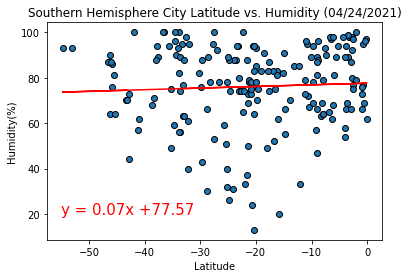

<Figure size 432x288 with 0 Axes>

In [62]:
(slp4, int4, rval4, pval4, stderr4) = linregress(southernHemisphere["Lat"], southernHemisphere["Humidity"])
fit4 = southernHemisphere["Lat"] * slp4 + int4
line_eq4 = "y = " + str(round(slp4,2)) + "x +" + str(round(int4,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Humidity"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit4,"r-")
plt.annotate(line_eq4,(-55, 20),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Humidity (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

print(f"The r-squared value is {rval4}")
plt.show()
plt.savefig("Figures/SouthernHemisphereVSHumidity.png", bbox_inches="tight")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.1665938303385174


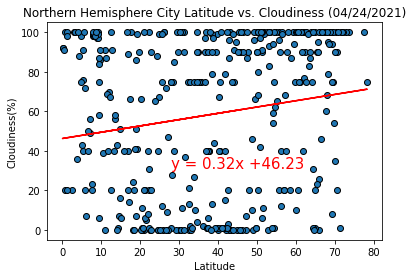

<Figure size 432x288 with 0 Axes>

In [63]:
(slp5, int5, rval5, pval5, stderr5) = linregress(northernHemisphere["Lat"], northernHemisphere["Cloudiness"])
fit5 = northernHemisphere["Lat"] * slp5 + int5
line_eq5 = "y = " + str(round(slp5,2)) + "x +" + str(round(int5,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Cloudiness"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit5,"r-")
plt.annotate(line_eq5,(28,31),fontsize=15,color="red")

plt.title("Northern Hemisphere City Latitude vs. Cloudiness (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared value is {rval5}")
plt.show()
plt.savefig("Figures/NorthernHemisphereVSCloudiness.png", bbox_inches="tight")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is -0.0006515747839528723


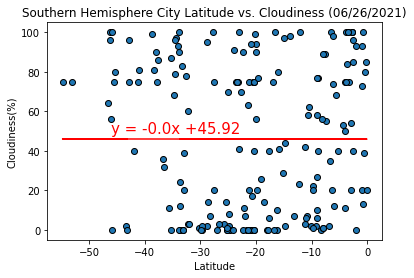

<Figure size 432x288 with 0 Axes>

In [64]:
(slp6, int6, rval6, pval6, stderr6) = linregress(southernHemisphere["Lat"], southernHemisphere["Cloudiness"])
fit6 = southernHemisphere["Lat"] * slp6 + int6
line_eq6 = "y = " + str(round(slp6,2)) + "x +" + str(round(int6,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Cloudiness"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit6,"r-")
plt.annotate(line_eq6,(-46,49),fontsize=15,color="red")

plt.title("Southern Hemisphere City Latitude vs. Cloudiness (06/26/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

print(f"The r-squared value is {rval6}")
plt.show()
plt.savefig("Figures/SouthernHemisphereVSCloudiness.png", bbox_inches="tight")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.12254762902674088


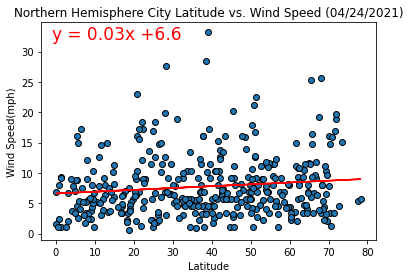

<Figure size 432x288 with 0 Axes>

In [65]:
(slp7, int7, rval7, pval7, stderr7) = linregress(northernHemisphere["Lat"], northernHemisphere["Wind Speed"])
fit7 = northernHemisphere["Lat"] * slp7 + int7
line_eq7 = "y = " + str(round(slp7,2)) + "x +" + str(round(int7,2))

plt.scatter(northernHemisphere["Lat"], northernHemisphere["Wind Speed"], edgecolor='black')
plt.plot(northernHemisphere["Lat"], fit7,"r-")
plt.annotate(line_eq7,(-1,32),fontsize=17,color="red")

plt.title("Northern Hemisphere City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

print(f"The r-squared value is {rval7}")
plt.show()
plt.savefig("Figures/NorthernHemisphereVSWindSpeed.png", bbox_inches="tight")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.2263379055246607


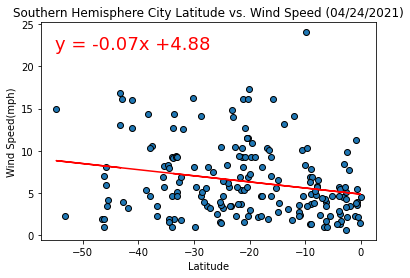

<Figure size 432x288 with 0 Axes>

In [66]:
(slp8, int8, rval8, pval8, stderr8) = linregress(southernHemisphere["Lat"], southernHemisphere["Wind Speed"])
fit8 = southernHemisphere["Lat"] * slp8 + int8
line_eq8 = "y = " + str(round(slp8,2)) + "x +" + str(round(int8,2))

plt.scatter(southernHemisphere["Lat"], southernHemisphere["Wind Speed"], edgecolor='black')
plt.plot(southernHemisphere["Lat"], fit8,"r-")
plt.annotate(line_eq8,(-55,22),fontsize=18,color="red")

plt.title("Southern Hemisphere City Latitude vs. Wind Speed (04/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

print(f"The r-squared value is {rval8}")
plt.show()
plt.savefig("Figures/SouthernHemisphereVSWindSpeed.png", bbox_inches="tight")